In [33]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [34]:
import pandas as pd
df = pd.read_csv('data/score.csv')
df
group = df.groupby('SW특기').size()
group

SW특기
C#            2
Java          3
Javascript    1
Python        2
dtype: int64

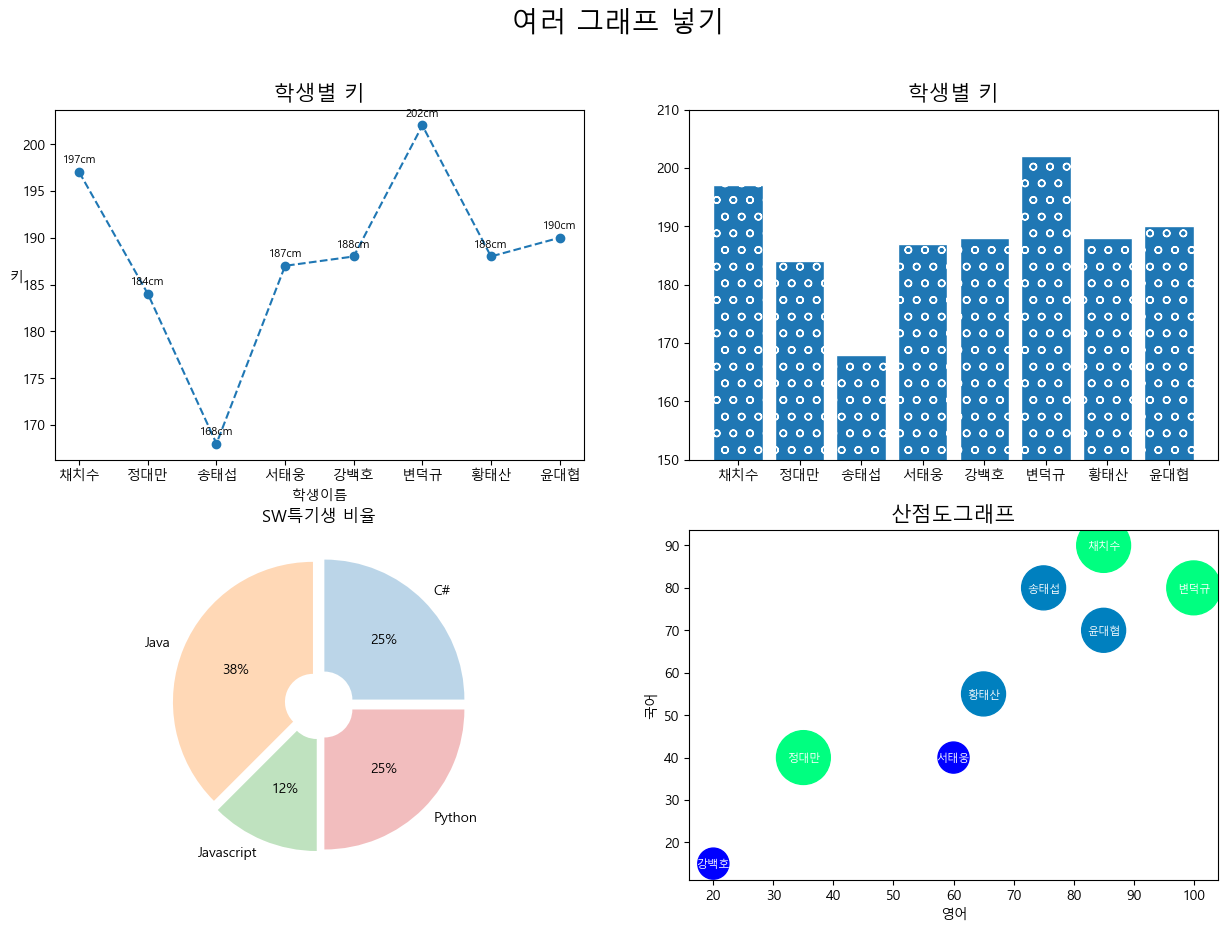

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('여러 그래프 넣기', size=20)

#첫번째 그래프
axs1 = axs[0, 0]
axs1.plot(df['이름'], df['키'], marker = 'o', ls= '--')
axs1.set_title('학생별 키', size = 15)
axs1.set_xlabel('학생이름')
axs1.set_ylabel('키', rotation=0)
for idx in range(len(df)):
    x= idx
    y= df.loc[idx, '키']
    text = f'{y}cm'
    axs1.text(x, y+1, text, size=8, ha='center')
    
#두번째 그래프
axs2 = axs[0, 1]
axs2.set_title('학생별 키', size =15)
axs2.bar(df['이름'], df['키'], hatch='o', ec='w')
axs2.set_ylim(150, 210)

#세번째 그래프
group = df.groupby('SW특기').size()
axs3 = axs[1, 0]
axs3.set_title('SW특기생 비율')
axs3.pie(group.values, labels=group.index, autopct='%.0f%%', explode= [0.05] * len(group), wedgeprops={'width':0.8, 'alpha':0.3})

#네번째 그래프
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]
axs4 = axs[1, 1]
axs4.set_title("산점도그래프", size = 15)
axs4.scatter(df['영어'], df['국어'], sizes=df['학년'] *500, c =df['학년'], cmap='winter')
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    text = df.loc[idx, '이름']
    axs4.text(x, y-1, text, ha='center', size=8, c='white')

plt.show()

In [36]:
df = pd.read_csv('data/score.csv')
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,1번,채치수,북산고,197,90,85,100,95,85,Python
1,2번,정대만,북산고,184,40,35,50,55,25,Java
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript
3,4번,서태웅,북산고,187,40,60,70,75,80,Java
4,5번,강백호,북산고,188,15,20,10,35,10,Java
5,6번,변덕규,능남고,202,80,100,95,85,80,C#
6,7번,황태산,능남고,188,55,65,45,40,35,Python
7,8번,윤대협,능남고,190,70,85,90,95,95,C#


In [37]:
df['평균'] = df.apply(lambda m:m['국어':'사회'].mean(), axis=1)
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,70,85,90,95,95,C#,87.0


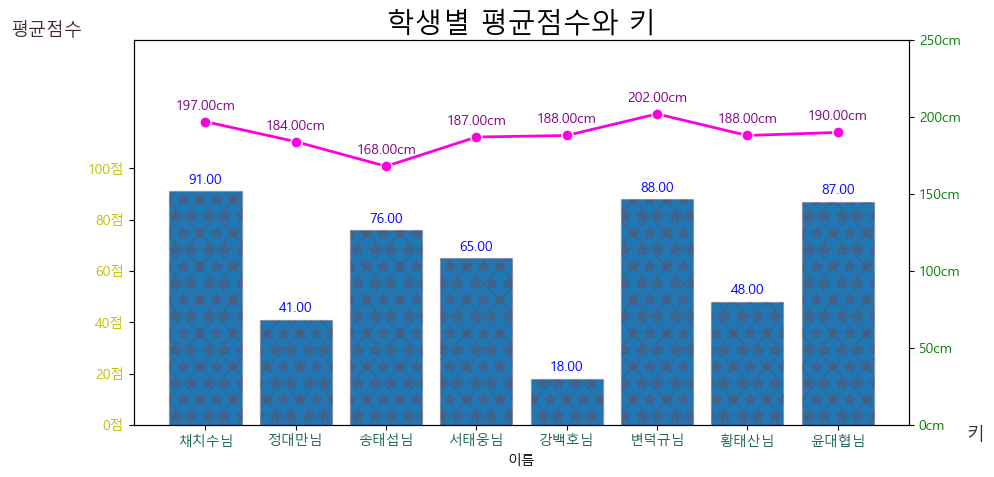

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('학생별 평균점수와 키', size=20)
ax.bar(df['이름'], df['평균'], hatch='x*', ec="#79424750")
ax.set_xlabel('이름')
ax.set_xticks(df['이름'], df['이름']+'님')
plt.xticks(c="#115F4E")
ax.set_ylabel('평균점수', rotation=0, loc='top', c="#402B2B", size=13)
ax.set_ylim(0, 150)
yticks = [y for y in range(0, 101, 20)]
ax.set_yticks(yticks, [f'{ytick}점' for ytick in yticks], c='y')
for idx, y in enumerate(df['평균']):
    ax.text(idx, y+3, f'{y:.2f}', ha='center', c='b')
ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], color="#ff00dd", marker='o', ms=8, lw=2, mec='w')
ax2.set_ylabel('키', rotation=0, loc='bottom', c="#402B2B", size=13)
ax2.set_ylim(0, 250)
yticks = [y for y in range(0, 251, 50)]
ax2.set_yticks(yticks, [f'{ytick}cm' for ytick in yticks], c='g')
for idx, y in enumerate(df['키']):
    ax2.text(idx, y+8, f'{y:.2f}cm', ha='center', c='purple')
plt.savefig('data/평균점수와키.png')
plt.show()



